In [16]:
import pandas as pd
data = pd.read_csv('../iris.csv')

- 각 군집의 거리가 얼마나 잘 분리되어있는지 확인하는 방법
- 실루엣 계수의 전체평균에서 멀어질 수록 잘 군집화 되지못한 클러스터임을 확인 함.

In [ ]:
# 각각의 그룹값을 종명칭으로 대체합니다.
data= data.replace({'Setosa':0})
data= data.replace({'Versicolor':1})
data= data.replace({'Virginica':2})
data

In [21]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd

kmeans = KMeans(n_clusters=3, random_state=0).fit(data[['sepal.length','sepal.width','petal.length','petal.width']])
iris_fit = pd.concat([data, pd.DataFrame(kmeans.labels_)], axis=1)
iris_fit.columns = ['sepal.length','sepal.width','petal.length','petal.width','variety', 'KmeansFit']

In [23]:
iris_fit

,sepal.length,sepal.width,petal.length,petal.width,variety,KmeansFit
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


0.5528190123564102


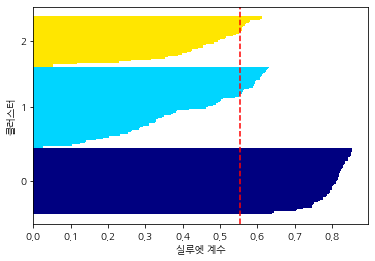

In [28]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
# 클러스터 셋팅
clustnumber = 3

# 실루엣 확인
k = []
def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0 ,0
    yticks = []
    
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
        
    silhoutte_avg = np.mean(silhouette_vals)
    k.append(silhouette_vals)
    print(silhoutte_avg)
    plt.axvline(silhoutte_avg, color='red', linestyle='--')
    plt.yticks(yticks, cluster_labels)
    plt.ylabel('클러스터')
    plt.xlabel('실루엣 계수')
    plt.show()

km = KMeans(n_clusters=clustnumber,  random_state = 1234) 
y_km = km.fit_predict(data[['sepal.length','sepal.width','petal.length','petal.width']])
plotSilhouette(data[['sepal.length','sepal.width','petal.length','petal.width']] , y_km)

0.6810461692117465


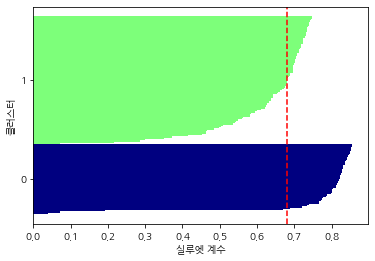

In [29]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
# 클러스터 셋팅
clustnumber = 2

# 실루엣 확인
k = []
def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0 ,0
    yticks = []
    
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
        
    silhoutte_avg = np.mean(silhouette_vals)
    k.append(silhouette_vals)
    print(silhoutte_avg)
    plt.axvline(silhoutte_avg, color='red', linestyle='--')
    plt.yticks(yticks, cluster_labels)
    plt.ylabel('클러스터')
    plt.xlabel('실루엣 계수')
    plt.show()

km = KMeans(n_clusters=clustnumber,  random_state = 1234) 
y_km = km.fit_predict(data[['sepal.length','sepal.width','petal.length','petal.width']])
plotSilhouette(data[['sepal.length','sepal.width','petal.length','petal.width']] , y_km)